<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [8]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [9]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [10]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [11]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


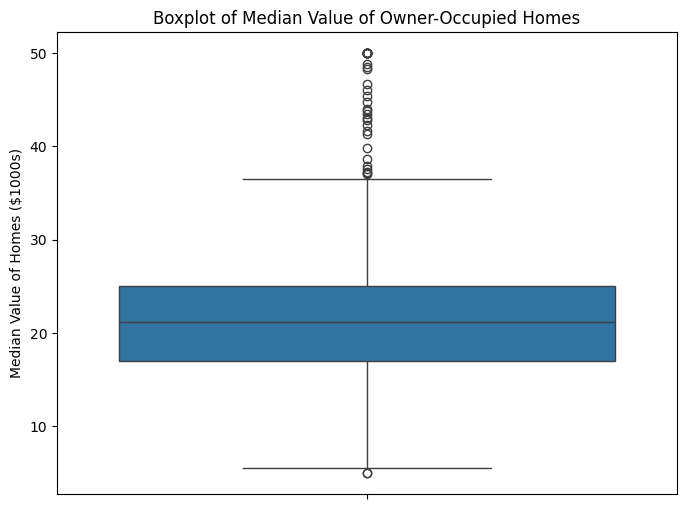

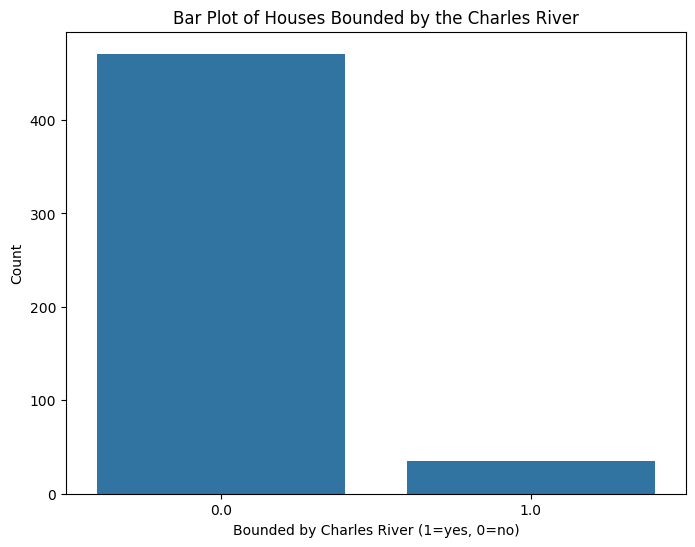

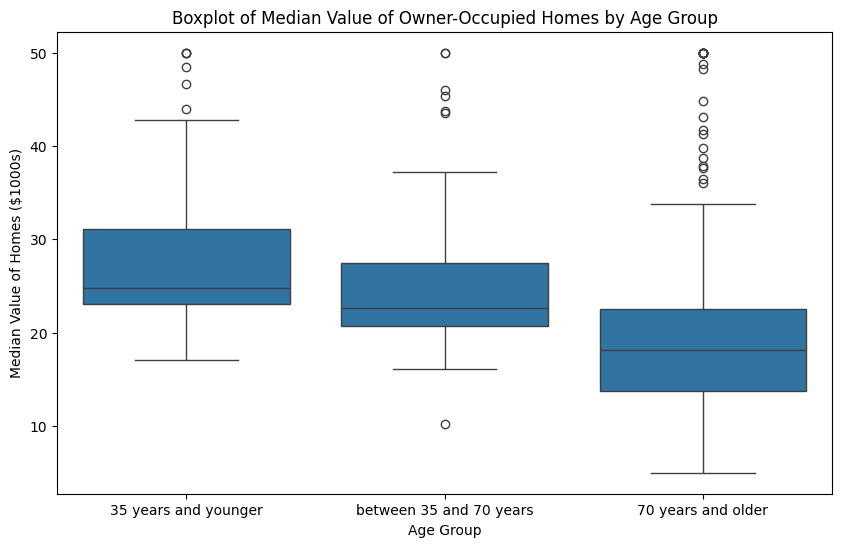

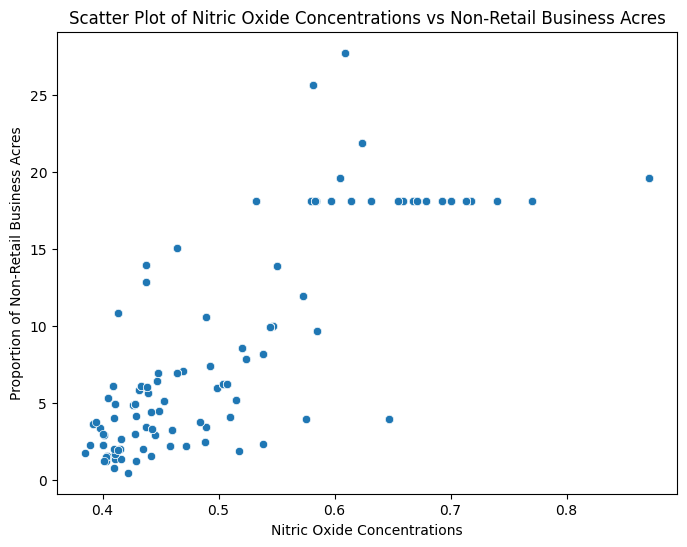

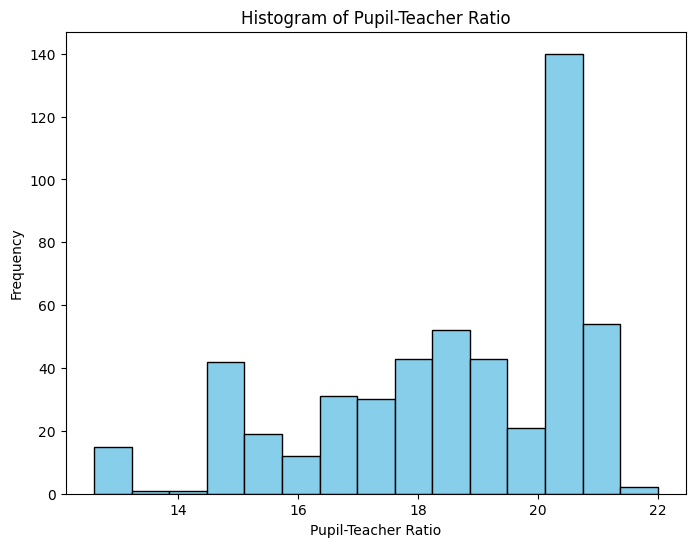

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from js import fetch
import io

async def fetch_data(url):
    resp = await fetch(url)
    data = await resp.arrayBuffer()
    return io.BytesIO(data.to_py())

async def read_dataset():
    URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
    boston_url = await fetch_data(URL)
    boston_df = pd.read_csv(boston_url)
    return boston_df
    
async def hypothesis_testing():
    boston_df = await read_dataset()
    
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=boston_df, y='MEDV')
    plt.title('Boxplot of Median Value of Owner-Occupied Homes')
    plt.ylabel('Median Value of Homes ($1000s)')
    plt.show()
    
    plt.figure(figsize=(8, 6))
    sns.countplot(data=boston_df, x='CHAS')
    plt.title('Bar Plot of Houses Bounded by the Charles River')
    plt.xlabel('Bounded by Charles River (1=yes, 0=no)')
    plt.ylabel('Count')
    plt.show()
    
    boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, max(boston_df['AGE'])], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=boston_df, x='AGE_group', y='MEDV')
    plt.title('Boxplot of Median Value of Owner-Occupied Homes by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Median Value of Homes ($1000s)')
    plt.show()
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=boston_df, x='NOX', y='INDUS')
    plt.title('Scatter Plot of Nitric Oxide Concentrations vs Non-Retail Business Acres')
    plt.xlabel('Nitric Oxide Concentrations')
    plt.ylabel('Proportion of Non-Retail Business Acres')
    plt.show()
    
    plt.figure(figsize=(8, 6))
    plt.hist(boston_df['PTRATIO'], bins=15, color='skyblue', edgecolor='black')
    plt.title('Histogram of Pupil-Teacher Ratio')
    plt.xlabel('Pupil-Teacher Ratio')
    plt.ylabel('Frequency')
    plt.show()

await hypothesis_testing()

Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

α = 0.05

In [17]:
from scipy import stats

river_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_river_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_statistic, p_value = stats.ttest_ind(river_bounded, not_river_bounded)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in median value of houses.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in median value of houses.")


T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Conclusion: Reject the null hypothesis. There is a significant difference in median value of houses.


Hypothesis:

Null Hypothesis (H0): There is no significant difference in the median value of houses between those bounded by the Charles river and those not bounded by it.
Alternative Hypothesis (H1): There is a significant difference in the median value of houses between those bounded by the Charles river and those not bounded by it.
Test Statistics:

T-statistic: 3.9964
P-value: 7.39e-05
Conclusion:

Since the p-value (7.39e-05) is less than the significance level (α = 0.05), we reject the null hypothesis.
Therefore, we conclude that there is a significant difference in the median value of houses between those bounded by the Charles river and those not bounded by it.

Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
Test:

α = 0.05

In [19]:
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(boston_df[boston_df['AGE'] < 30]['MEDV'],
                                 boston_df[(boston_df['AGE'] >= 30) & (boston_df['AGE'] < 60)]['MEDV'],
                                 boston_df[(boston_df['AGE'] >= 60) & (boston_df['AGE'] < 90)]['MEDV'],
                                 boston_df[boston_df['AGE'] >= 90]['MEDV'])

print("F-statistic:", f_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in Median values of houses for each age group.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in Median values of houses for each age group.")


F-statistic: 27.524771166616528
P-value: 1.709821859896023e-16
Conclusion: Reject the null hypothesis. There is a significant difference in Median values of houses for each age group.


Hypothesis:

Null Hypothesis (H0): There is no significant difference in the median values of houses for each age group of owner-occupied units built prior to 1940.
Alternative Hypothesis (H1): There is a significant difference in the median values of houses for each age group of owner-occupied units built prior to 1940.
Test Statistics:

F-statistic: 27.52
P-value: 1.71e-16
Conclusion:

Since the p-value (1.71e-16) is less than the significance level (α = 0.05), we reject the null hypothesis.
Therefore, we conclude that there is a significant difference in the median values of houses for each age group of owner-occupied units built prior to 1940.

Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

α = 0.05

In [21]:
correlation_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

if abs(correlation_coefficient) < 0.05 or p_value > 0.05:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("Conclusion: Reject the null hypothesis. There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")


Pearson Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
Conclusion: Reject the null hypothesis. There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


Hypothesis:

Null Hypothesis (H0): There is no significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
Alternative Hypothesis (H1): There is a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
Test Statistics:

Pearson Correlation Coefficient: 0.7637
P-value: 7.91e-98
Conclusion:

Since the p-value (7.91e-98) is much less than the significance level (α = 0.05) and the correlation coefficient is significant, we reject the null hypothesis.
Therefore, we conclude that there is a significant positive relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

α = 0.05

In [23]:
import statsmodels.api as sm

X = boston_df['DIS']

y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        20:19:58   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Hypothesis:

Null Hypothesis (H0): The additional weighted distance to the five Boston employment centers has no impact on the median value of owner-occupied homes.
Alternative Hypothesis (H1): The additional weighted distance to the five Boston employment centers has a significant impact on the median value of owner-occupied homes.
Test Statistics:

Coefficient of the 'DIS' variable: 1.0916
P-value: < 0.001
Conclusion:

Since the p-value (< 0.001) is less than the significance level (α = 0.05), we reject the null hypothesis.
Therefore, we conclude that there is a significant positive impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.